In [1]:
import pandas as pd

In [2]:
# To load data:
master_data = pd.read_csv('Data/master_data.csv')

Pad the countyFIPS column and set it to be master_data's index.

In [3]:
def pad_fips(code):
    """
    Function prepends zeros to the beginning of countyFIPS 
    codes whose lengths are less than five characters long.
    Returns the code as a string.
    """
    code_str = str(code)
    while len(code_str) < 5:
        code_str = '0' + code_str
    return code_str

In [4]:
master_data['countyFIPS'] = master_data['countyFIPS'].apply(lambda x: pad_fips(x))

In [5]:
master_data.set_index('countyFIPS', inplace=True)

In [6]:
# Create the filtered dataset for later use by removing the Alaska data that does not have a binary encoding
filtered_master_data = master_data[master_data["Biden_or_Trump"] != -1]

### First create an interactive map with the collected information on each county

In [7]:
# The Choropleth plotly package has the old FIPS code for Oglala Lakota County, South Dakota. So just for the
# map, I will change the FIPS code so the county appears.

as_list = [str(code) for code in master_data.index.tolist()]
shannon_idx = as_list.index('46102')

as_list[shannon_idx] = '46113'
master_data.index = as_list

In [8]:
def format_vote_pct(pct):
    """
    Function below takes a vote share as a decimal
    and returns it formatted as a string with '%'
    appended. If the input is NaN, the function will
    return 'N/A'.
    """
    if pd.isnull(pct):
        return 'N/A'
    else:
        return str(round(pct * 100, 2)) + '%' 

In [9]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
    
import plotly.express as px

In [10]:
labels_map = {-1: 'N/A', 0: 'Trump', 1: 'Biden'}

In [11]:
# Simple vote share map
vote_share_fig = px.choropleth(master_data, geojson=counties, locations=master_data.index.tolist(), 
                    color=master_data['Biden_or_Trump'].apply(lambda x: labels_map[x]).tolist(),  
                    color_discrete_map={'N/A': '#808080', 'Trump': '#ff0d00', 'Biden': '#007cf7'},
                    labels={'color': 'Winner', 'locations': 'County FIPS Code'},
                    hover_name=master_data['County Name'] + ', ' + master_data['State'],
                    hover_data={
                        'Trump Vote Share': master_data['Trump %'].apply(format_vote_pct).tolist(), 
                        'Biden Vote Share': master_data['Biden %'].apply(format_vote_pct).tolist()
                    },
                    title='2020 Presidential Election Results by County, Vote Share',
                    scope="usa"
                   )

vote_share_fig.show()

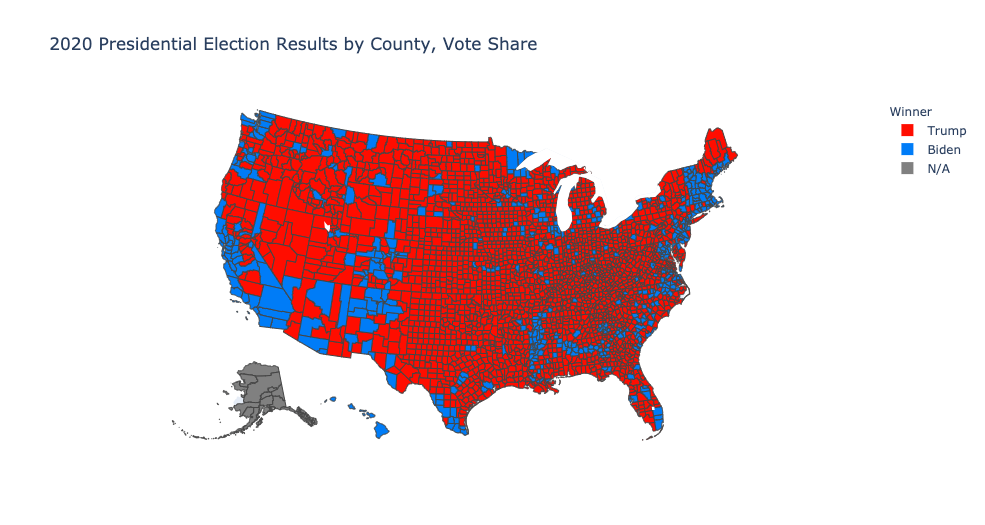

In [13]:
# NOTE: this code is not necessary if you actually run this notebook. I had to show the plots as still images 
# because the plotly interactive maps made the files too large to upload to GitHub
from IPython.display import Image 

Image("election_map.png")

#### Create 4 different visualizations. In these visualizations each county will still be color coded based on how it voted, but the information that appears on hover will be different. The topics of these visualizations will be Demographic, Economics and Education, Population Size, and COVID respectively.

In [14]:
def format_pct(pct):
    """
    Function below will take a percentage as a float, cast
    it to a string, append '%' to the end and return the string.
    """
    return str(pct) + '%'

In [ ]:
# Demographics Plot
demographics_fig = px.choropleth(master_data, geojson=counties, locations=master_data.index.tolist(), 
                    color=master_data['Biden_or_Trump'].apply(lambda x: labels_map[x]).tolist(),  
                    color_discrete_map={'N/A': '#808080', 'Trump': '#ff0d00', 'Biden': '#007cf7'},
                    labels={'locations': 'County FIPS Code', 'color': 'Winner'},
                    hover_name=master_data['County Name'] + ', ' + master_data['State'],
                    hover_data={
                        'Trump Vote Share': master_data['Trump %'].apply(format_vote_pct).tolist(), 
                        'Biden Vote Share': master_data['Biden %'].apply(format_vote_pct).tolist(),
                        'White': master_data['% White'].apply(format_pct).tolist(), 
                        'Black': master_data['% Black'].apply(format_pct).tolist(),
                        'Asian': master_data['% Asian'].apply(format_pct).tolist(),
                        'Hispanic or Latino': master_data['% Hispanic or Latino'].apply(format_pct).tolist(),
                        'Native American': master_data['% Native American'].apply(format_pct).tolist(),
                        'Hawaiian or Pacific Islander': master_data['% Hawaiian or Pacific Islander'].apply(format_pct).tolist(),
                        'Veterans': master_data['% Veteran'].apply(format_pct).tolist(),
                        'Median Age (years)': master_data['Median Age'].tolist()
                    },
                    title='2020 Presidential Election Results by County, Demographics (Race, Age, Veteran Status)',
                    scope="usa"
                   )

demographics_fig.show()

In [ ]:
# Economics and Education
econ_edu_fig = px.choropleth(master_data, geojson=counties, locations=master_data.index.tolist(), 
                    color=master_data['Biden_or_Trump'].apply(lambda x: labels_map[x]).tolist(),  
                    color_discrete_map={'N/A': '#808080', 'Trump': '#ff0d00', 'Biden': '#007cf7'},
                    labels={'locations': 'County FIPS Code', 'color': 'Winner'},
                    hover_name=master_data['County Name'] + ', ' + master_data['State'],
                    hover_data={
                        'Trump Vote Share': master_data['Trump %'].apply(format_vote_pct).tolist(), 
                        'Biden Vote Share': master_data['Biden %'].apply(format_vote_pct).tolist(),
                        'September 2020 Unemployment Rate': master_data['Unemployment Rate (%) - Sept'].apply(format_pct).tolist(),
                        'Poverty Rate': master_data['Poverty Rate (%)'].apply(format_pct).tolist(),
                        'Median Household Income': master_data['Median Household Income ($)'].apply(lambda x: '$' + "{:,}".format(x)), # add commas to the int
                        'Share of pop. with a college degree': master_data['% of adults with a college degree or higher'].apply(format_pct).tolist(),
                    },
                    title='2020 Presidential Election Results by County, Economics and Education',
                    scope="usa"
                   )

econ_edu_fig.show()

In [ ]:
# Population Characteristics
population_fig = px.choropleth(master_data, geojson=counties, locations=master_data.index.tolist(), 
                    color=master_data['Biden_or_Trump'].apply(lambda x: labels_map[x]).tolist(),  
                    color_discrete_map={'N/A': '#808080', 'Trump': '#ff0d00', 'Biden': '#007cf7'},
                    labels={'locations': 'County FIPS Code', 'color': 'Winner'},
                    hover_name=master_data['County Name'] + ', ' + master_data['State'],
                    hover_data={
                        'Trump Vote Share': master_data['Trump %'].apply(format_vote_pct).tolist(), 
                        'Biden Vote Share': master_data['Biden %'].apply(format_vote_pct).tolist(),
                        'Population ': master_data['Population'].apply(lambda x: ' ' + "{:,}".format(x)),
                        'Population Density': master_data['Population Density (per sq. mi)'].apply(lambda x: " " + "{:,}".format(x) + ' / sq mi'),
                        'Population Change': master_data['Population Change (%)'].apply(format_pct).tolist(),
                    },
                    title='2020 Presidential Election Results by County, Population (Size, Density, Change)',
                    scope="usa"
                   )

population_fig.show()

In [ ]:
# COVID
covid_fig = px.choropleth(master_data, geojson=counties, locations=master_data.index.tolist(), 
                    color=master_data['Biden_or_Trump'].apply(lambda x: labels_map[x]).tolist(),  
                    color_discrete_map={'N/A': '#808080', 'Trump': '#ff0d00', 'Biden': '#007cf7'},
                    labels={'locations': 'County FIPS Code', 'color': 'Winner'},
                    hover_name=master_data['County Name'] + ', ' + master_data['State'],
                    hover_data={
                        'Trump Vote Share': master_data['Trump %'].apply(format_vote_pct).tolist(), 
                        'Biden Vote Share': master_data['Biden %'].apply(format_vote_pct).tolist(),
                        'Cases': master_data['COVID Cases'].apply(lambda x: "{:,}".format(x)),
                        'Deaths': master_data['COVID Deaths'].apply(lambda x: "{:,}".format(x)),
                        'Cases per 100k': master_data['COVID Cases per 100k'].apply(lambda x: "{:,}".format(x)),
                        'Deaths per 100k': master_data['COVID Deaths per 100k'].apply(lambda x: "{:,}".format(x))
                    },
                    title='2020 Presidential Election Results by County, COVID-19',
                    scope="usa"
                   )

covid_fig.show()

#### Now create a function that can take a feature from master_data as an argument and return a map colored by that variable. Counties should still show the winner and vote share on hover as well as the metric that was passed as an argument,

In [15]:
def create_map(column_name, color_scale='greens'):
    """
    Creates a Choropleth map colored by the provided
    column_name.
    color_scale can be a string or a px.colors
    list such as px.colors.diverging.Tropic[::-1],
    which is how you reverse the colorscale.
    See https://plotly.com/python/builtin-colorscales/ for 
    colorscales.
    """
    fig = px.choropleth(master_data, geojson=counties, locations=master_data.index.tolist(),
                  color=master_data[column_name].tolist(), 
                  labels={'color': column_name, 'locations': 'County FIPS Code'},
                  hover_name=master_data['County Name'] + ', ' + master_data['State'],
                  hover_data={
                      'Trump': master_data['Trump %'].apply(format_vote_pct).tolist(),
                      'Biden': master_data['Biden %'].apply(format_vote_pct).tolist(),
                  },
                  color_continuous_scale=color_scale,
                  title="2020 Presidential Election Results, Color Coded by " + column_name,
                  scope="usa"
                 )
    fig.show()

In [18]:
create_map('% Black')

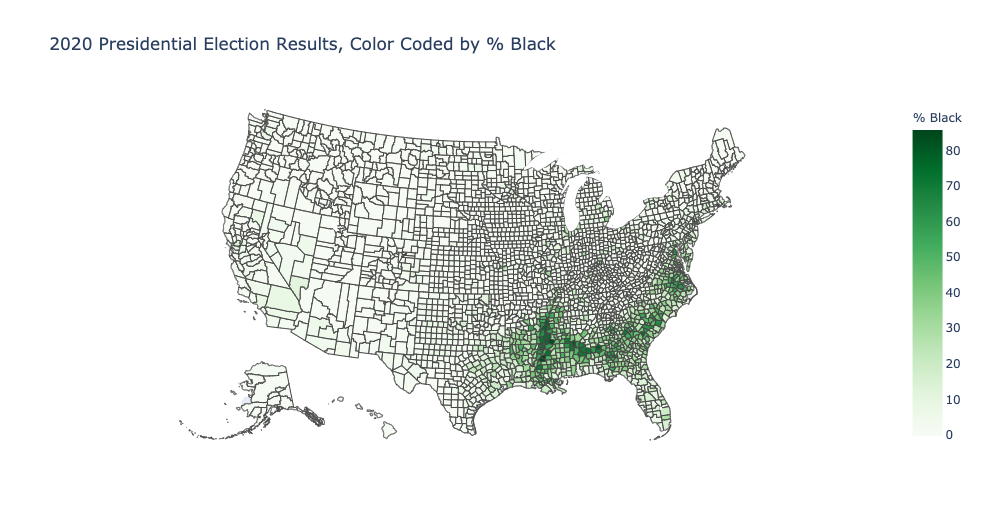

In [19]:
# NOTE: this code is not necessary if you actually run this notebook. I had to show the plots as still images 
# because the plotly interactive maps made the files too large to upload to GitHub
Image("black_pop_map.png")

## Analysis and Plots

#### Find the features most correlated with a county voting for Biden and Trump

In [20]:
master_data.corr()['Biden %'].sort_values(ascending=False)

Biden %                                        1.000000
Biden_or_Trump                                 0.782051
% of adults with a college degree or higher    0.530293
% Asian                                        0.464061
% Black                                        0.449046
Unemployment Rate (%) - Sept                   0.406166
Population                                     0.359917
COVID Cases                                    0.307890
COVID Deaths                                   0.302679
Population Density (per sq. mi)                0.268930
Median Household Income ($)                    0.265508
% Female                                       0.201157
COVID Deaths per 100k                          0.152255
Population Change (%)                          0.151880
% Hispanic or Latino                           0.143096
% Hawaiian or Pacific Islander                 0.099383
% Native American                              0.093480
Poverty Rate (%)                               0

In [21]:
master_data.corr()['Trump %'].sort_values(ascending=False)

Trump %                                        1.000000
% White                                        0.512583
Median Age                                     0.257395
% Male                                         0.197121
% Veteran                                      0.165264
COVID Cases per 100k                          -0.003512
Poverty Rate (%)                              -0.058190
% Native American                             -0.097982
% Hawaiian or Pacific Islander                -0.103780
% Hispanic or Latino                          -0.138228
COVID Deaths per 100k                         -0.138644
Population Change (%)                         -0.158523
% Female                                      -0.197121
Population Density (per sq. mi)               -0.264775
Median Household Income ($)                   -0.276017
COVID Deaths                                  -0.297618
COVID Cases                                   -0.305432
Population                                    -0

The feature most positively correlated with voting for Biden was the percentage of adults with a college degree or higher in a county. To be clear, the correlation coefficient is 0.53, so it is only a moderate correlation and as always correlation does not imply causation. Nonetheless, it does show that counties with higher levels of education tended to vote more for Biden. This also means that counties with lower levels of education tended to vote more for Trump.

The feature most positively correlated with voting for Trump was the percentage of a county's population that was White. This feature's correlation coefficient is 0.51, which is once again only a moderate correlation. Still, counties with higher shares of Whites tended to vote more for Trump, and counties that were less White tended to vote more for Biden. 

### Below are the distributions of the feature most positively correlated with Biden preference and the feature most positively correlated with Trump preference.

In [22]:
import plotly.graph_objects as go

def plot_box_dist(feature_name):
    """
    Function takes a feature_name string and returns
    an interactive boxplot of this feature grouped
    by Trump vs. Biden counties.
    The plot shows the maximum values, minimum values
    quartiles, and median of the given feature.
    """
    fig = go.Figure()

    fig.add_trace(go.Box(
        x=filtered_master_data[filtered_master_data['Biden_or_Trump'] == 1]['Biden_or_Trump'],
        y=filtered_master_data[filtered_master_data['Biden_or_Trump'] == 1][feature_name],
        name="Biden",       # this sets its legend entry
        hoverinfo='y',
    ))

    fig.add_trace(go.Box(
        x=filtered_master_data[filtered_master_data['Biden_or_Trump'] == 0]['Biden_or_Trump'],
        y=filtered_master_data[filtered_master_data['Biden_or_Trump'] == 0][feature_name],
        name="Trump",       # this sets its legend entry
        hoverinfo='y',
    ))


    fig.update_layout(
        title=feature_name + ', Grouped by Trump vs. Biden Counties',
        yaxis_title=feature_name,
    )

    fig.show()

In [25]:
# Plot the distribution of the most positively correlated Biden feature
plot_box_dist('% of adults with a college degree or higher')

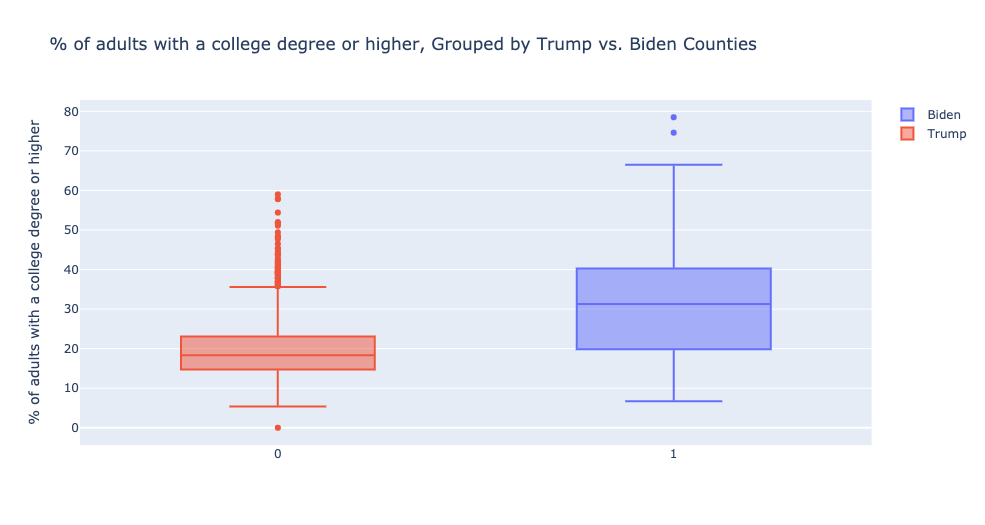

In [26]:
# NOTE: this code is not necessary if you actually run this notebook. I had to show the plots as still images 
# because the plotly interactive maps made the files too large to upload to GitHub
Image("education_boxplots.png")

The way to interpret the above plot is as follows: In the median Trump county, 18.3% of adults had at least a college degree. In other words, if you sort all Trump counties from highest education level to lowest and take the county exactly in the middle, 18.3% of the adults in that county will have a college degree or higher.

For Biden counties, the median was 31.3%. Half of Biden counties are more educated than this, and half are less educated.

In [27]:
# Plot the distribution of the most positively correlated Trump feature
plot_box_dist('% White')

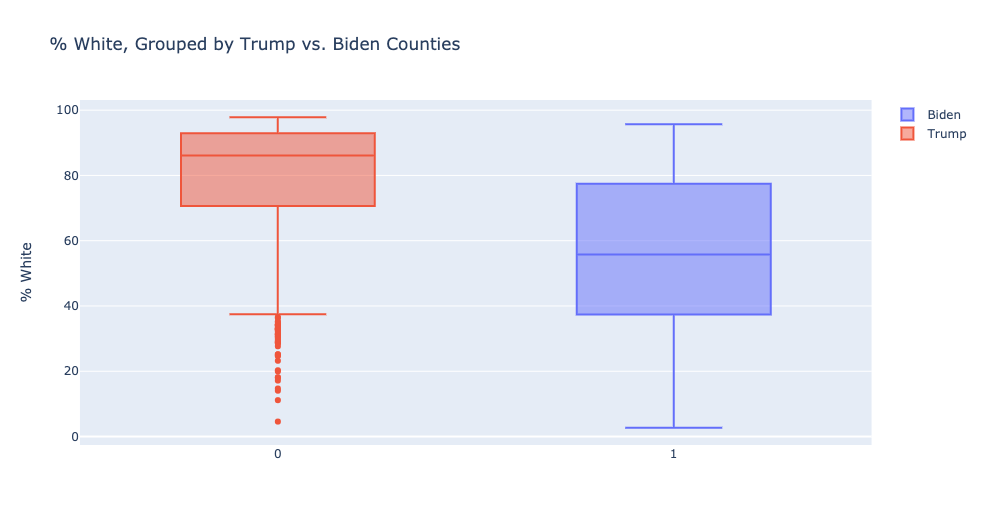

In [28]:
# NOTE: this code is not necessary if you actually run this notebook. I had to show the plots as still images 
# because the plotly interactive maps made the files too large to upload to GitHub
Image("white_boxplots.png")

The median Trump county was 86.09% White and the median Biden county was 55.79% White. 

## Build the Model
The goal here is to figure out which features are the most important when classifying whether a county voted for Trump or Biden. If you had to guess whether a county went for Trump or Biden, what would you want to know about that county before making your guess?

To figure out which features are the most important, I will build a random forest classifier model. Although random forests can be used as predictive models, they are also great explanatory models because they can calculate importance scores for each feature. After building a random forest model and training it on the election data, the model will be able to say which features are the most important for determining if a county voted for Biden or Trump, and as an added benefit, the model will also be able to take an unlabeled county and predict who it voted for.

#### First remove the columns you won't be using as features. Use filtered_master_data which is stripped of the Alaska missing data.

In [29]:
filtered_master_data.columns

Index(['County Name', 'State', 'COVID Cases', 'COVID Deaths', 'Population',
       'COVID Cases per 100k', 'COVID Deaths per 100k',
       'Unemployment Rate (%) - Sept', 'Poverty Rate (%)',
       'Median Household Income ($)',
       '% of adults with a college degree or higher', '% Male', '% Female',
       '% White', '% Black', '% Native American', '% Asian',
       '% Hawaiian or Pacific Islander', '% Hispanic or Latino',
       'Population Density (per sq. mi)', 'Median Age', '% Veteran',
       'Population Change (%)', 'Trump %', 'Biden %', 'Biden_or_Trump'],
      dtype='object')

Some of these columns will be dropped either because they will not be used as numerical predictors (such as State and County Name) or because they can be perfectly predicted from other features (% Male and % Female) and will incur the wrath of multicollinearity if they're not removed.

In [30]:
X = filtered_master_data[['Population', 'COVID Cases per 100k', 'COVID Deaths per 100k', 
                      'Unemployment Rate (%) - Sept', 'Poverty Rate (%)', 'Median Household Income ($)',
                      '% of adults with a college degree or higher', '% Male', '% White', '% Black', 
                      '% Native American', '% Asian', '% Hawaiian or Pacific Islander', '% Hispanic or Latino',
                      'Population Density (per sq. mi)', 'Median Age', '% Veteran', 'Population Change (%)' 
                     ]]
y = filtered_master_data['Biden_or_Trump']

In [31]:
print(X.shape)
X.head()

(3112, 18)


,Population,COVID Cases per 100k,COVID Deaths per 100k,Unemployment Rate (%) - Sept,Poverty Rate (%),Median Household Income ($),% of adults with a college degree or higher,% Male,% White,% Black,% Native American,% Asian,% Hawaiian or Pacific Islander,% Hispanic or Latino,Population Density (per sq. mi),Median Age,% Veteran,Population Change (%)
countyFIPS,,,,,,,,,,,,,,,,,,
01001,55869,3889.46,53.70,5.2,13.8,59338,27.7,48.49,73.77,19.86,0.43,1.16,0.07,2.99,94,37.8,12.28,2.33
01003,223234,3120.49,31.81,5.5,9.8,57588,31.3,48.49,83.21,8.61,0.68,1.05,0.06,4.72,141,42.8,11.94,22.48
01005,24686,4297.98,36.46,8.6,30.9,34382,12.2,52.92,45.51,47.83,0.38,0.47,0.13,4.52,28,39.9,7.67,-10.09
01007,22394,3920.69,66.98,6.6,21.8,46064,11.5,53.27,74.41,21.07,0.41,0.21,0.03,2.78,36,39.9,7.15,-2.27
01009,57826,3622.94,43.23,4.0,13.2,50412,12.6,49.24,86.77,1.51,0.49,0.28,0.04,9.65,90,40.8,8.53,0.88


In [32]:
print(y.shape)
y.head()

(3112,)


countyFIPS
01001    0
01003    0
01005    0
01007    0
01009    0
Name: Biden_or_Trump, dtype: int64

#### First divide data into training and test sets. (I won't create a validation set explicitly because I will perform cross validation later using GridSearchCV)
NOTE: Normally I would split my data into these sets before doing any of the analysis I did above so I don't have a chance to peek at the test data, but I needed all of the data for my map visualizations and wanted to create visualizations and plots to use regardless of this model.

In [33]:
# Check the class balance to see if there are significantly more Trump or Biden counties
y.value_counts()

0    2585
1     527
Name: Biden_or_Trump, dtype: int64

There is indeed a class imbalance, with Biden counties comrpising about 17% of the total number of counties. As an aside, that is a really fascinating statistic because Biden is on track to win the popular vote by 5-6 million votes but won fewer than one fifth of the counties in America. That illustrates how a small minority of counties are home to the majority of America's population.

Anyway, due to this class imbalance, I will have to make sure my data is split into training and test sets in a way that maintains the balance between these classes.

In [35]:
from sklearn.model_selection import train_test_split

# Set the stratify parameter to ensure that the class balance is maintained in both train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [36]:
y_train.value_counts() / len(y_train)

0    0.830856
1    0.169144
Name: Biden_or_Trump, dtype: float64

In [37]:
y_test.value_counts() / len(y_test)

0    0.829856
1    0.170144
Name: Biden_or_Trump, dtype: float64

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2489, 18)
(623, 18)
(2489,)
(623,)


### Create the RandomForest model
I will use a GridSearch to find the best hyperparameters for the RandomForestClassifier. I'm using GridSearch rather than RandomizedSearch because I do not have a very large number of hyperparameters to test. I'm testing a total of 16 x 2 = 32 different models.

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': list(range(95, 111)),
    'criterion': ['gini', 'entropy'],
}

forest_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(forest_clf, param_grid, cv=5, scoring='roc_auc', verbose=1)

In [40]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

The default number of trees a RandomForest fits (n_estimators) is 100, so I began by tested a range of values from 95 to 110 to determine the best number of trees. The grid search determined that the best model has 106 trees.

In [42]:
# Below are the parameters of the best estimator the grid search found
grid_search.best_params_

{'criterion': 'entropy', 'n_estimators': 106}

In [43]:
# Below is the AUC score that the best estimator achieved 
grid_search.best_score_

0.9732280805550747

In [44]:
# Set the best estimator to a variable so it can be accessed easily
best_forest = grid_search.best_estimator_

In [45]:
from sklearn.metrics import confusion_matrix

# Predict the labels
y_pred = best_forest.predict(X_train)

print(confusion_matrix(y_train, y_pred))

[[2068    0]
 [   0  421]]


As you can see above, the model classifies every county in the training dataset correctly. However, it's possible that the model overfit the training data, so the model must be evaluated on the test set. Below I calculate the model's AUC score and make predictions on the test set. The model misclassifies some counties, but overall it generalizes pretty well.

In [46]:
best_forest.score(X_test, y_test)

0.9454253611556982

In [47]:
y_pred = best_forest.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[504  13]
 [ 21  85]]


### Interpret the Random Forest's feature importances
The real goal of this project has always been to understand which features are the most important for determining whether a county voted for Trump or Biden. Below is a plot of the most important features.

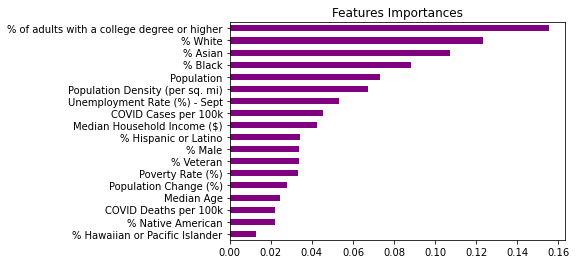

In [48]:
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances = pd.Series(data=best_forest.feature_importances_, index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='purple')
plt.title('Features Importances')
plt.show()

As you can see above, relative to the other variables, education level was the most important feature when determining whether a county voted for Trump or Biden.

The interpretation of these feature importances is a little tricky. Even though education level has the highest feature importance, it doesn't necessarily mean that education level is the first question you should ask when trying to figure out if a county voted Trump or Biden. What it means is that across all the trees in the random forest, splitting on the education level had the largest average decrease in impurity.

Regardless of this nuance though, what this essentially tells us is that on average, the education level of a county will be very helpful in determining whether a county voted for Trump or Biden. So if you know nothing else about a county and want to guess if it went for Trump or Biden, asking about the education level will give you some of the most useful information. You would probably have to know more than just the education level, such as how White the population is, but education level alone could take you a long way.

Now with all that said, based on the corelations and other analysis, I would argue that education level is the first question you should ask about followed by the percentage of Whites in the population.

## Conclusion

#### My analysis found that the education level of a county, quantified as the percentage of adults with a college degree or higher, was the most important factor determining whether a county voted for Biden or Trump. Counties with a higher percentage of people with at least a college degree tended to vote for Biden, and those with a lower percentage tended to vote for Trump.
	
#### My results should not be a surprise to anyone who follows politics: there has been much commentary over the past few years about the difference in the education levels of the Republican and Democratic voter bases. Although my results mostly confirmed what many already knew, the point of this project was to use my data cleaning, visualization, and machine learning skills, along with a dash of domain expertise, to answer a question I had about American voting patterns. In the process, I also created informative map visualizations and have created an extensive dataset with geographic, economic, and demographic information about every county in the United States. In fact, this dataset may be the most valuable result of the project, as I could not find this information about every county in any single centralized location. Now I have this data cleaned and centralized in one place for anyone else to use.